# Machine Learning

_Leszek Frąś, Mikołaj Leszczuk_

![](https://carlolepelaars.nl/wp-content/uploads/2018/10/frabz-Machine-Learning-What-society-thinks-I-do-What-my-friends-thinks-f0e58e-700x510.jpg)

## Konspekt

* Czym jest uczenie maszynowe?
* Dlaczego warto korzystać z uczenia maszynowego?
* Rodzaje systemów uczenia maszynowego
* Jak rozróżnić?
* Drzewo decyzyjne
* Las losowy

## Czym jest uczenie maszynowe?

"Uczenie maszynowe to dziedzina nauki dająca komputerom możliwość uczenia się bez konieczności ich jawnego programowania..." Arthur Samuel, 1959.

A bardziej technicznie:

"Mówimy ze program komputerowy uczy się na podstawie doświadczenia $E$ w odniesieniu do jakiegoś zadania $T$ i pewnej miary wydajności $P$, jeśli jego wydajność (mierzona przez $P$) wobec zadania $T$ wzrasta z nabywaniem doświadczenia $E$...", Tom Mitchell, 1997.

## Dlaczego warto korzystać z uczenia maszynowego?

![](https://raw.githubusercontent.com/miklesz/Courses/main/Machine%20Learning/ml1.png)

Zadanie: napisać filtr spamu, przy pomocy tradydycyjnych technik programistycznych
1. Zastanowienie jak wygląda klasyczny spam - powtarzające się wyrażenia: okazja, darmowe, bonus, promocja, gratis, bez limitów. Występowanie: temat wiadomości
2. Napisanie algorytmu wykrywającego każdy z zaobserwowanych szablonów. Program oznaczałby wiadomość jako spam, jeśli wykryłby jeden z kilku określonych wzorców.
3. Testowanie programu, ciągłe powtarzanie kroków 1. i 2.

=> a co jeśli spamerzy zauważyli by blokowanie algorytmu wykrywającego nieporządane mejle?

Próby omijania filtrów: wkomponowywanie białych znaków, znaków specjalnych

=> należy non stop uwzględniać nowe zmiany poprzez dopisywanie nowych reguł...

Najlepsze rozwiązanie?

Stworzenie samouczącego się algorytmu, na podstawie przykładów i kombinacji z nim związanych.

![](https://raw.githubusercontent.com/miklesz/Courses/main/Machine%20Learning/ml2.png)

Wykorzystanie technik uczenia maszynowego do analizowania olbrzymich ilości danych może pomóc w wykrywaniem nieoczywistych wzorców. Proces nazywa się wydobywaniem danych (data mining).

Uczenie maszynowe nadaje się do:
1. Problemów, które wymagają częstego dostrajania algorytmu lub korzystania z długich list reguł
2. Złożonych problemów, trudnych do rozwiązania tradycyjnymi metodami.
3. Zmiennych środowisk wpływających na problematykę.
4. Pomagania człowiekowu w analizowaniu skomplikowanych zagadnień i olbrzymich ilości danych.

## Rodzaje systemów uczenia maszynowego

### Uczenie nadzorowane

=> dane są oznakowane, jest zbiór uczący oraz zbiór weryfikacyjny

* metoda k-najbliższych sąsiadów
* regresja liniowa
* regresja logistyczna
* maszyna wektorów nośnych
* drzewa decyzyjne i losowe lasy
* sieci neuronowe

### Uczenie nienadzorowane

=> dane uczące są nieoznakowane; program uczy się bez nauczyciela

* metoda k-średnich lub centroidów (ang. _k-means_)
* hierarchiczna analiza skupień (ang. _Hierarchical Cluster Analysis_, HCA)
* wykrywawenie anomali i nowości (ang. _anomaly detection and novelety detection_)
* wizualiacja i redukcje wymiarowości

## Jak rozróżnić?

Dobry przykładem jest analiza skupień...

(źródło: Uczenie maszynowe z użyciem Scikit-Learn i Tensorflow, Aureilen Geron, 2020, Gliwice)

![](https://raw.githubusercontent.com/miklesz/Courses/main/Machine%20Learning/ml3.jpeg)

lub wykrywanie anomalii:

(źródło: Uczenie maszynowe z użyciem Scikit-Learn i Tensorflow, Aureilen Geron, 2020, Gliwice)

![](https://raw.githubusercontent.com/miklesz/Courses/main/Machine%20Learning/ml4.jpeg)

Oczywiście jest wiele innych rodzajów "uczenia" maszynowego:

* Uczenie przez wzmacnianie (ang. _reinforcement learning_):

System uczący (zwany agentem) obserwuje środowisko i na tej podstawie wykonuje pewne czynności, a take odbiera nagrody lub kary.

(źródło: Uczenie maszynowe z użyciem Scikit-Learn i Tensorflow, Aureilen Geron, 2020, Gliwice)

![](https://raw.githubusercontent.com/miklesz/Courses/main/Machine%20Learning/ml5_0.png)

![](https://raw.githubusercontent.com/miklesz/Courses/main/Machine%20Learning/ml5_1.png)

![](https://raw.githubusercontent.com/miklesz/Courses/main/Machine%20Learning/ml5_2.png)

* Uczenie wsadowe:

Do nauki rozpoznawanie (klasyfikacji) wykorzystywane są wszystkie dostępne dane. System nie jest w stanie trenować przyrostowo, do jego nauki poświęca się dużej ilości czasu i zasobów.

* Uczenie przyrostowe:

System jest trenowany na bieżąco przez sekwencyjnie dostarczane dane, które mogą być pojedyncze lub przyjmować postać minipakietów (niewielkich zbiorów).

## Drzewo decyzyjne

### Wstęp teoretyczny 

**Drzewo decyzyjne** – graficzna metoda wspomagania **procesu decyzyjnego**, stosowana w **teorii decyzji**. **Algorytm** drzew decyzyjnych jest również stosowany w **uczeniu maszynowym** do pozyskiwania wiedzy na podstawie przykładów.

W **teorii decyzji** drzewo decyzyjne jest **drzewem decyzji** i ich możliwych konsekwencji (**stanów natury**). Zadaniem drzew decyzyjnych może być zarówno stworzenie planu, jak i rozwiązanie problemu decyzyjnego.

Metoda drzew decyzyjnych jest szczególnie przydatna w problemach decyzyjnych z licznymi, rozgałęziającymi się wariantami oraz w przypadku podejmowania decyzji w warunkach **ryzyka**.

#### Konstruowanie drzewa decyzyjnego

Rozpocznijmy od przykładu, który rozwiążemy przy pomocy drzewa decyzyjnego.

##### Przykładowy problem decyzyjny

_Student Leszek obudził się 25 minut przed egzaminem. Profesor był formalistą i nawet minuta spóźnienia wykluczała możliwość pisania egzaminu, Leszkowi groziła więc sesja poprawkowa. Sprawa była jednak znacznie bardziej skomplikowana, gdyż Leszek miał zamiar wyjechać do pracy do Stanów Zjednoczonych, zaś wcześniejszy powrót we wrześniu oznaczałby dla niego utratę 4000 zł zarobków. Jeżeli jednak zdążyłby dotrzeć na czas, to rodzice w nagrodę za dobre oceny kupiliby mu prezent (zazwyczaj wartości 500 zł)._

_Leszek musiał więc starannie przemyśleć, w jaki sposób dotrzeć do szkoły. Autobus nie wchodził w grę, jazda nim zajmowała co najmniej 40 minut. Pozostawała jeszcze inna możliwość – pożyczyć samochód ojca. Samochód ten jednak był w kiepskim stanie i szanse na dojechanie do szkoły wynosiły 90%, zaś w przypadku awarii Leszek musiałby pokryć część kosztów naprawy, gdyż ojciec od dawna winił go za zły stan samochodu (3 tys. zł). Oprócz tego musiał zdecydować, czy opłaca się jechać przez miasto szybko, czy wolno. Przy wolnej jeździe dotarłby na czas z prawdopodobieństwem 60%, natomiast przy szybkiej zdążyłby na pewno (Leszek potrafił naprawdę szybko jeździć). Mógł jednak zostać zatrzymany przez patrol policji, co groziło mandatem w wysokości 500 zł (prawdopodobieństwa trafienia na patrol – 20%)._

_Druga możliwość to wynajęcie taksówki, za którą trzeba będzie zapłacić 30 zł. Jednak taksówkę trzeba będzie znaleźć w ciągu kilku minut, co można wykonać z prawdopodobieństwem sukcesu 80% (jeżeli nie będzie taksówki w pobliżu, Leszek już nie zdąży). Aby ponaglić kierowcę, Leszek może wręczyć napiwek w wysokości 20 zł, co zwiększy szanse na dotarcie na czas do 85% (w przeciwnym wypadku tylko 70%)._

Jaką decyzję powinien podjąć Leszek?

##### Budowanie drzewa

Drzewo składa się z węzłów (decyzji i stanów natury) i gałęzi (możliwych wariantów). Tradycyjnie decyzje oznaczamy prostokątami, natomiast stany natury kołami.

Konstrukcję drzewa rozpoczynamy od korzenia. Na początku Leszek ma do wyboru: samochód lub taksówkę:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Drzewo_decyzyjne_-_etap_1.svg/300px-Drzewo_decyzyjne_-_etap_1.svg.png)

Rozpatrzmy węzeł samochód. Mamy do czynienia z dwoma stanami natury: samochód zepsuje się lub dojedzie. Sytuacja, w której samochód zepsuje się, jest jednocześnie węzłem końcowym, gdyż Leszek nie ma już żadnego wyboru:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Drzewo_decyzyjne_-_etap_2.svg/300px-Drzewo_decyzyjne_-_etap_2.svg.png)

W ten sposób kontynuujemy konstrukcję całego drzewa.

W prawidłowo skonstruowanym drzewie węzły decyzyjne i stanów natury powinny występować na przemian, zaś każda ścieżka powinna być zakończona węzłem końcowym.

#### Rozwiązywanie problemu decyzyjnego

Rozwiązywanie problemu przy pomocy drzewa decyzyjnego rozpoczynamy od węzłów końcowych tego drzewa, przypisując im końcowe wypłaty. Przykładowo, dla sekwencji: taksówka → znajdzie → napiwek → zdąży, końcowa wypłata wynosi 4000 zł (zarobek w Stanach) + 500 zł (prezent) − 30 zł (koszt taksówki) − 20 zł (napiwek) = 4450 zł.

Następnym krokiem jest zaznaczenie przy gałęziach wychodzących ze stanów natury odpowiadających im prawdopodobieństw. Na przykład dla węzła nr 6 prawdopodobieństwa wynoszą: policja – 0,2, uda się – 0,8.

Kolejny krok to wyznaczenie dla każdego węzła – stanu natury wartości oczekiwanej. Np. dla węzła nr 6 wartość oczekiwana wyniesie: 0,2 · (−500) zł + 0,8 · 4500 zł = 3500 zł. Przy każdym węźle decyzyjnym zapisujemy największą wartość z wyznaczonych wartości oczekiwanych (odpowiada to najkorzystniejszej decyzji). Teraz podczas cofania się po drzewie do korzenia wypełniamy kolejno wszystkie węzły.

Optymalna ścieżka decyzji jest wyznaczona przez największe wartości oczekiwane.

W podanym przykładzie z obliczeń wynika, że Leszek powinien poszukać taksówki i dać taksówkarzowi napiwek.

### Budowanie modelu klasyfikacji dla zbioru danych "**_Iris_**"

(na podstawie: Chanin Nantasenamat, <i>Data Professor YouTube channel, http://youtube.com/dataprofessor</i>)

Będziemy budować model klasyfikacji dla zbioru danych "**_Iris_**" (kosaciec, irys) przy użyciu algorytmu drzewa decyzyjnego.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Iris_sibirica_060603.jpg/672px-Iris_sibirica_060603.jpg)

#### Importowanie bibliotek

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

#### Załadowanie zestawu danych "**_Iris_**"

In [2]:
iris = datasets.load_iris()

#### Funkcje wejściowe


Zestaw danych "**_Iris_**" zawiera 4 cechy wejściowe i 1 zmienną wyjściową (etykieta klasy).

##### Funkcje wejściowe

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


```python
[
    'długość kielicha (cm)',
    'szerokość kielicha (cm)',
    'długość płatka (cm)',
    'szerokość płatka (cm)'
]
```

##### Funkcje wyjściowe

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


###### _Iris setosa_

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Irissetosa1.jpg/800px-Irissetosa1.jpg)

###### _Iris versicolor_

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/600px-Blue_Flag%2C_Ottawa.jpg)

###### _Iris virginica_

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/600px-Iris_virginica_2.jpg)

#### Spojrzenie na dane

##### Funkcje wejściowe

In [5]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

##### Zmienna wyjściowa (etykieta klasy)

In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


##### Wykresy kropkowe (scatter plots)

Przykład użycia tych parametrów na zbiorze Iris, zawierającym obserwacje trzech rodzajów kwiatów. W ten  sposób możemy pokazać wielowymiarowość danych - każda kropka oznacza jedną obserwacje, jej położenie mówi o rozmiarze kielichów, rozmiar kropki mówi o rozmiarze (szerokości) płatka kwiatu, a kolor przedstawia jego rodzaj.

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

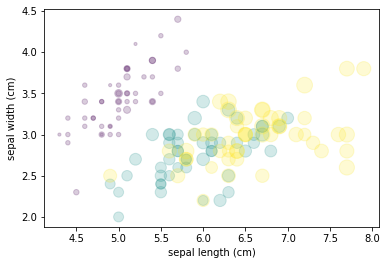

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
feat = iris.data.T  # features
plt.scatter(feat[0], feat[1], alpha=0.2, s=100*feat[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

##### Przypisywanie zmiennych *wejściowych* i *wyjściowych*

Przypiszmy 4 zmienne wejściowe do `X`, a zmienną wyjściową (etykieta klasy) do `Y`.

In [9]:
X = iris.data
Y = iris.target

##### Przyjrzyjmy się wymiarowi danych

In [10]:
print(X.shape)

(150, 4)


In [11]:
print(Y.shape)

(150,)


#### Zbudujmy model klasyfikacji za pomocą drzewa decyzyjnego

In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(X, Y)

DecisionTreeClassifier()

#### Znaczenie funkcji

In [27]:
print(clf.feature_importances_)

[0.03125    0.01666667 0.55524636 0.39683698]


#### Dokonujemy prognozy

In [15]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [16]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [17]:
print(clf.predict(X[[0]]))

[0]


In [18]:
print(clf.predict_proba(X[[0]]))

[[1. 0. 0.]]


In [ ]:
clf.fit(iris.data, iris.target_names[iris.target])

#### Podział danych (stosunek 80/20)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
X_train.shape, Y_train.shape

((120, 4), (120,))

In [21]:
X_test.shape, Y_test.shape

((30, 4), (30,))

#### Przebudujmy model drzewa decyzyjnego

In [22]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

##### Wykonajmy prognozę na pojedynczej próbce ze zbioru danych

In [23]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [24]:
print(clf.predict_proba([[5.1, 3.5, 1.4, 0.2]]))

[[1. 0. 0.]]


##### Wykonajmy prognozę na zbiorze testowym

###### *Przewidywane etykiety klas*

In [25]:
print(clf.predict(X_test))

[1 2 1 0 0 0 1 2 2 2 0 1 0 0 0 2 1 1 1 0 2 2 0 1 2 0 1 1 2 1]


###### *Rzeczywiste etykiety klas*

In [26]:
print(Y_test)

[1 2 1 0 0 0 1 2 2 2 0 2 0 0 0 2 1 1 1 0 2 2 0 1 2 0 1 1 2 1]


#### Wydajność modelu

In [28]:
print(clf.score(X_test, Y_test))

0.9666666666666667


## Las losowy

### Wstęp teoretyczny 

**Las losowy**, losowy las decyzyjny – metoda zespołowa uczenia maszynowego dla **klasyfikacji**, **regresji** i innych zadań, która polega na konstruowaniu wielu **drzew decyzyjnych** w czasie uczenia i generowaniu klasy, która jest **dominantą** klas (klasyfikacja) lub przewidywaną średnią (regresja) poszczególnych drzew. Losowe lasy decyzyjne poprawiają tendencję drzew decyzyjnych do **nadmiernego dopasowywania** się do zestawu treningowego.

Schemat losowego lasu decyzyjnego:

![Schemat losowego lasu decyzyjnego](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

### Budowanie modelu klasyfikacji dla zbioru danych "**_Iris_**"

(na podstawie: Chanin Nantasenamat, <i>Data Professor YouTube channel, http://youtube.com/dataprofessor</i>)

Będziemy budować model klasyfikacji dla zbioru danych "**_Iris_**" przy użyciu algorytmu losowego lasu.

#### Importowanie bibliotek

In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#### Załadowanie zestawu danych "**_Iris_**"

In [30]:
iris = datasets.load_iris()

##### Przypisywanie zmiennych *wejściowych* i *wyjściowych*

Przypiszmy 4 zmienne wejściowe do `X`, a zmienną wyjściową (etykieta klasy) do `Y`.

In [31]:
X = iris.data
Y = iris.target

#### Zbudujmy model klasyfikacji za pomocą losowego lasu

In [32]:
clf = RandomForestClassifier()

In [33]:
clf.fit(X, Y)

RandomForestClassifier()

#### Znaczenie funkcji

In [34]:
print(clf.feature_importances_)

[0.07904099 0.02122337 0.45071028 0.44902537]


#### Dokonujemy prognozy

In [35]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [36]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [37]:
print(clf.predict(X[[0]]))

[0]


In [38]:
print(clf.predict_proba(X[[0]]))

[[1. 0. 0.]]


In [ ]:
clf.fit(iris.data, iris.target_names[iris.target])

#### Podział danych (stosunek 80/20)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
X_train.shape, Y_train.shape

((120, 4), (120,))

In [41]:
X_test.shape, Y_test.shape

((30, 4), (30,))

#### Przebudujmy model losowego lasu

In [42]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

##### Wykonajmy prognozę na pojedynczej próbce ze zbioru danych

In [43]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [44]:
print(clf.predict_proba([[5.1, 3.5, 1.4, 0.2]]))

[[1. 0. 0.]]


##### Wykonajmy prognozę na zbiorze testowym

###### *Przewidywane etykiety klas*

In [45]:
print(clf.predict(X_test))

[1 2 0 2 0 1 1 1 0 0 1 1 2 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 2]


###### *Rzeczywiste etykiety klas*

In [46]:
print(Y_test)

[1 2 0 2 0 1 1 1 0 0 1 1 2 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 2]


#### Wydajność modelu

In [47]:
print(clf.score(X_test, Y_test))

1.0
